## Project on diabetes

### To understand the features affecting the diabetes and evaluating the models on classifications.

In [1]:
import psycopg2 as pg
import seaborn as sns
import pandas as pd
import numpy as np
from collections import defaultdict

import itertools
from copy import deepcopy

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression




import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('/Users/igung/kaplan/project3 diabetes/diabetes1.csv')


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
df['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

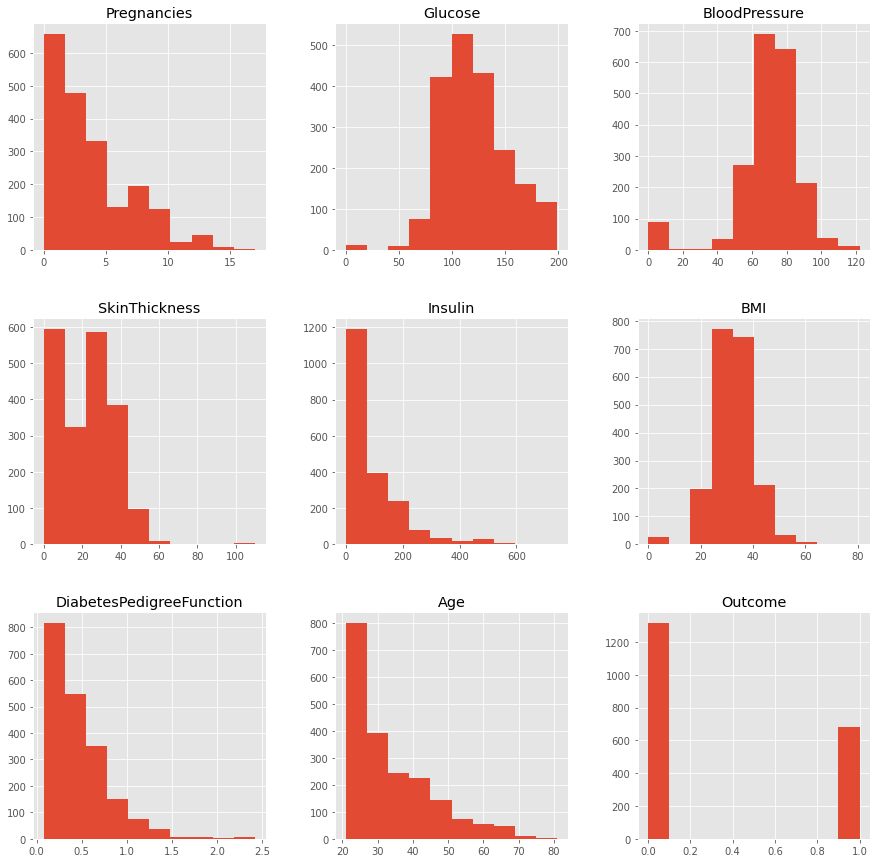

In [6]:
pd.DataFrame.hist(df,figsize=[15,15])
plt.savefig('plots.png')
plt.show()

In [7]:
df1 = df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,84,82,31,125,38.2,0.233,23
1,0,145,0,0,0,44.2,0.630,31
2,1,139,62,41,480,40.7,0.536,21
3,4,125,70,18,122,28.9,1.144,45
4,2,84,50,23,76,30.4,0.968,21


## Feature importance using random forest

In [8]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(df1, df["Outcome"])
for name, importance in zip(df1, rnd_clf.feature_importances_):
    print(name, "=", importance)

Pregnancies = 0.08229828924509734
Glucose = 0.2577484872775107
BloodPressure = 0.08979918756548748
SkinThickness = 0.06892736362511559
Insulin = 0.07451252455123207
BMI = 0.16458878306172123
DiabetesPedigreeFunction = 0.12418038062880793
Age = 0.13794498404502764


In [9]:
df1.columns.tolist()
#iris['feature_names']

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [10]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [11]:
df2 =df1.columns.tolist()
df2

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

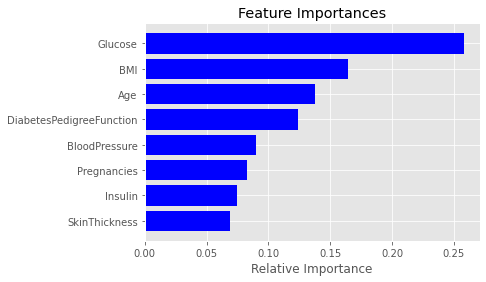

In [12]:
features = df2
importances = rnd_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('featureimportance.png')
plt.show()

In [13]:
#No diabetes vs. have diabetes 
counts = df['Outcome'].value_counts()
No_diabetes = counts[0]
Diabetes = counts[1]
perc_NoDiabetes = (No_diabetes/(No_diabetes+Diabetes))*100
perc_HaveDiabetes = (Diabetes/(No_diabetes+Diabetes))*100
print('There were {} no reported diabetes ({:.3f}%) and {} reported diabetes({:.3f}%).'.format(No_diabetes, perc_NoDiabetes, Diabetes, perc_HaveDiabetes))

There were 1316 no reported diabetes (65.800%) and 684 reported diabetes(34.200%).


Text(0.5, 0, '0:No reported diabetes, 1:Diabetes')

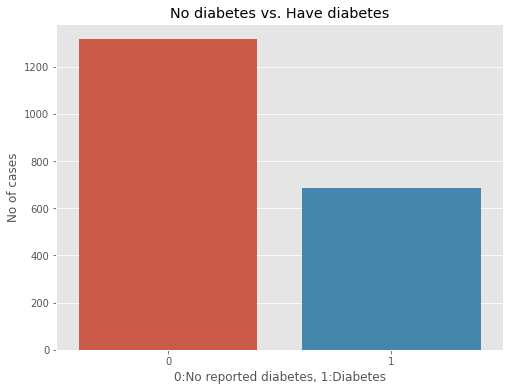

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('No diabetes vs. Have diabetes')
plt.ylabel('No of cases')
plt.xlabel('0:No reported diabetes, 1:Diabetes')

In [15]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


In [16]:
df1 =df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,84,82,31,125,38.2,0.233,23
1,0,145,0,0,0,44.2,0.630,31
2,1,139,62,41,480,40.7,0.536,21
3,4,125,70,18,122,28.9,1.144,45
4,2,84,50,23,76,30.4,0.968,21
...,...,...,...,...,...,...,...,...
1995,6,134,70,23,130,35.4,0.542,29
1996,2,87,0,23,0,28.9,0.773,25
1997,2,75,64,24,55,29.7,0.370,33
1998,6,85,78,0,0,31.2,0.382,42


In [17]:
df1= df[['Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age']]
df1

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,84,82,38.2,0.233,23
1,145,0,44.2,0.630,31
2,139,62,40.7,0.536,21
3,125,70,28.9,1.144,45
4,84,50,30.4,0.968,21
...,...,...,...,...,...
1995,134,70,35.4,0.542,29
1996,87,0,28.9,0.773,25
1997,75,64,29.7,0.370,33
1998,85,78,31.2,0.382,42


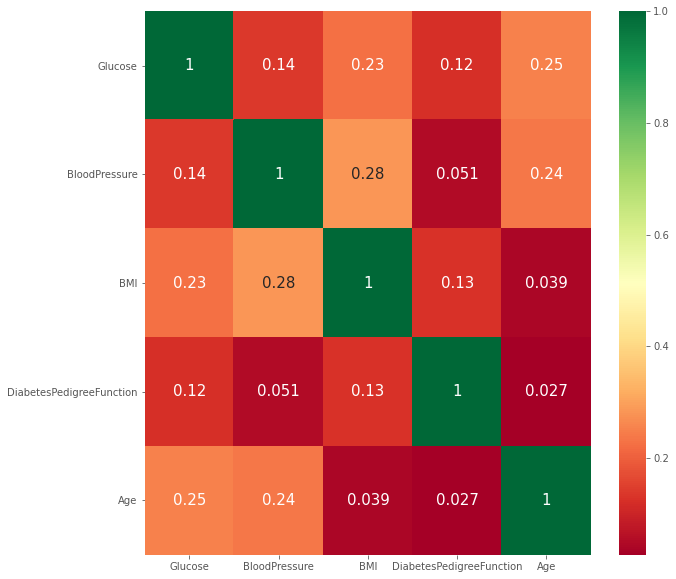

In [18]:
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,annot_kws={"size":15},cmap="RdYlGn")
#g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#g=sns.heatmap(df1[top_corr_features].corr(), vmin=df1[top_corr_features].values.min(), vmax=1, square=True, 
        #linewidths=0.1, annot=True, annot_kws={"size":20})



plt.savefig('heatmap.png')
plt.show()

In [19]:
pd.set_option('display.max_rows', None)

## Cross validation of data. Breaks the data into 5 folds. To train and validate the data. Then test the data.

### Cross validation on respective models.

### CV: Log regression

In [20]:
from sklearn.model_selection import KFold

In [21]:
X, y = df.drop('Outcome',axis=1), df['Outcome']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [22]:
kf = KFold(n_splits=5, shuffle=True, random_state = 10)
cv_lm3_r2s = []#collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
        
    lm3 = LogisticRegression(max_iter=10000)
    
    lm3.fit(X_train, y_train)
    cv_lm3_r2s.append(lm3.score(X_val, y_val))
    

print('Simple Log regression scores: ', cv_lm3_r2s)

print(f'Simple mean cv r^2: {np.mean(cv_lm3_r2s):.3f} +- {np.std(cv_lm3_r2s):.3f}')

Simple Log regression scores:  [0.75, 0.78125, 0.8125, 0.75625, 0.784375]
Simple mean cv r^2: 0.777 +- 0.022


### CV Random Forest

In [23]:
kf = KFold(n_splits=5, shuffle=True, random_state = 10)
cv_rf_r2s = []#collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
        
    rf = RandomForestClassifier()
    
    rf.fit(X_train, y_train)
    cv_rf_r2s.append(rf.score(X_val, y_val))    

print('Random forest scores: ', cv_rf_r2s)

print(f'Simple mean cv r^2: {np.mean(cv_rf_r2s):.3f} +- {np.std(cv_rf_r2s):.3f}')


Random forest scores:  [0.953125, 0.9625, 0.978125, 0.934375, 0.959375]
Simple mean cv r^2: 0.957 +- 0.014


### CV Gausian Naive Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
kf = KFold(n_splits=5, shuffle=True, random_state = 10)
cv_gnb_r2s = []#collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    gnb = GaussianNB()
    
    gnb.fit(X_train, y_train)
    cv_gnb_r2s.append(gnb.score(X_val, y_val))

print('GaussianNB scores: ', cv_gnb_r2s)
print(f'Simple mean cv r^2: {np.mean(cv_gnb_r2s):.3f} +- {np.std(cv_gnb_r2s):.3f}')

GaussianNB scores:  [0.734375, 0.775, 0.771875, 0.76875, 0.775]
Simple mean cv r^2: 0.765 +- 0.015


### CV SVM

In [25]:
from sklearn import svm
kf = KFold(n_splits=5, shuffle=True, random_state = 10)
cv_sv_r2s = []#collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    sv = svm.LinearSVC(dual =False)
    
    sv.fit(X_train, y_train)
    cv_sv_r2s.append(sv.score(X_val, y_val))
        
print('SVM scores: ', cv_sv_r2s)
print(f'Simple mean cv r^2: {np.mean(cv_sv_r2s):.3f} +- {np.std(cv_sv_r2s):.3f}')

SVM scores:  [0.74375, 0.775, 0.803125, 0.7625, 0.78125]
Simple mean cv r^2: 0.773 +- 0.020


### CV KNN

In [26]:
kf = KFold(n_splits=5, shuffle=True, random_state = 10)
cv_knn_r2s = []#collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    knn = KNeighborsClassifier(n_neighbors=20)
    
    knn.fit(X_train, y_train)
    cv_knn_r2s.append(knn.score(X_val, y_val))

    
print('Knn scores: ', cv_knn_r2s)
print(f'Simple mean cv r^2: {np.mean(cv_knn_r2s):.3f} +- {np.std(cv_knn_r2s):.3f}')

Knn scores:  [0.746875, 0.778125, 0.790625, 0.725, 0.803125]
Simple mean cv r^2: 0.769 +- 0.029


## Confusion matrix

### Choosing the best model i.e Random forest for doing the confusion matrix

### Data Split

In [27]:
#drop the predicted column
data = df.drop(columns=['Outcome'])
answer = df['Outcome']

In [28]:
from sklearn.preprocessing import StandardScaler

X_break, X_test, y_break, y_test = train_test_split(data, answer, \
                                                    test_size=0.2, stratify=df['Outcome'],
                                                    random_state=10)

#random_state generates a set kind of deck for each random state. 42 will always be the same kind of split
X_train, X_val, y_train, y_val = train_test_split(X_break, y_break, \
                                                    test_size=0.2, stratify=y_break,
                                                    random_state=10)

In [29]:
def make_confusion_matrix_val(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_val, y_predict)
    plt.figure(dpi=100)
    sns.set(font_scale=1)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['No diabetes', 'Diabetes'],
           yticklabels=['No diabetes', 'Diabetes']);
    TP = fraud_confusion[0][0]
    FP = fraud_confusion[0][1]
    FN = fraud_confusion[1][0]
    TN = fraud_confusion[1][1]
    plt.yticks(rotation = 0)
    plt.title('Actual vs. Predicted',fontname = '.SF Compact Display',fontsize = 20,pad = 10);
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

In [30]:
# Run CV with 5 folds (Random Forest)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [2, 5],
    'n_estimators': [50, 70]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=2, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train,y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  38 out of  48 | elapsed:    3.2s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  43 out of  48 | elapsed:    3.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    3.3s finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 70]},
             scoring='roc_auc', verbose=10)

In [31]:
# #interactive confusion matrix
from ipywidgets import interactive, FloatSlider
plt.savefig('confusion.png')
plt.show()
interactive(lambda threshold: make_confusion_matrix_val(rf_grid, threshold), threshold=(0.0,1.0,0.02))


<Figure size 432x288 with 0 Axes>

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

### Find ROC scores for all models

### Logistic Regression

In [32]:
from sklearn import linear_model

penalty = ['l2']
C = np.logspace(0, 4, 10, 100, 1000)
param_grid = dict(C=C, penalty=penalty)

logistic = linear_model.LogisticRegression(solver='lbfgs', max_iter=10000)
logistic_grid = GridSearchCV(logistic, param_grid, cv=2, scoring='roc_auc', verbose=10, n_jobs=-1)
logistic_grid.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0700s.) Setting batch_size=2.


Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished


GridSearchCV(cv=2, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.15443469e+01, 4.64158883e+02, 1.00000000e+04,
       2.15443469e+05, 4.64158883e+06, 1.00000000e+08, 2.15443469e+09,
       4.64158883e+10, 1.00000000e+12]),
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

## Naive Bayes

In [33]:
# Fit a Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_best = gnb.fit(X_train, y_train)

In [34]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)

0.7525

In [35]:
nb.score(X_val, y_val)

0.7875

### Random Forest

In [36]:
# Run CV with 5 folds (Random Forest)

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt'],
    'min_samples_leaf': [10, 20],
    'min_samples_split': [2, 5],
    'n_estimators': [50, 70]
}

rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, param_grid, cv=2, scoring='roc_auc', verbose=10, n_jobs=-1)
rf_grid.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 24 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Batch computation too fast (0.1750s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  28 out of  48 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  38 out of  48 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.2s finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 70]},
             scoring='roc_auc', verbose=10)

### KNN

In [37]:
knn = KNeighborsClassifier(n_neighbors=20)
knn_best = knn.fit(X_train, y_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_val, y_val)))

The score for kNN is
Training:  79.61%
Validation set:  76.88%


### Dummy Classifier

In [38]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

C:\Users\igung\anaconda3\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier()

### Support vector metrics

In [39]:
from sklearn import svm, datasets
svc = svm.SVC()
param_grid = {
    'intercept_scaling': [1],
    'loss': ['squared_hinge'],
    'max_iter': [1000],
    'multi_class': ['ovr'],
    'penalty': ['l2'],
}
clf = GridSearchCV(svc, param_grid)
#sv = sv.LinearSVC(dual =False)

svc_grid = GridSearchCV(sv, param_grid, cv=2, scoring='roc_auc', verbose=10, n_jobs=-1)
svc_grid.fit(X_train,y_train)


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0180s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished


GridSearchCV(cv=2, estimator=LinearSVC(dual=False), n_jobs=-1,
             param_grid={'intercept_scaling': [1], 'loss': ['squared_hinge'],
                         'max_iter': [1000], 'multi_class': ['ovr'],
                         'penalty': ['l2']},
             scoring='roc_auc', verbose=10)

In [40]:
#from sklearn.linear_model import LogisticRegression

#lr = LogisticRegression()

print(svc.get_params().keys())

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])


In [41]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Plot all models on roc

In [42]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, accuracy_score

def roc_scores(X_value, Y_value):
    #in sample
    model_list = [logistic_grid.best_estimator_, 
#                  svc_grid.best_estimator_, 
                  gnb_best,
                  rf_grid.best_estimator_,
                  dummy,knn_best
                 ]

    model_name = ['Logit','Naive Bayes','Random Forest','Dummy','KNN']

    # Plot ROC curve for all my models
    fig, ax = plt.subplots(figsize=(20,18))
    for i, model in enumerate(model_list):
        y_pred = list(model.predict_proba(X_value)[:,1])
        fpr, tpr, threshold = metrics.roc_curve(Y_value, y_pred)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = (model_name[i] + ' AUC = %0.4f' % roc_auc),linewidth=2.0)
    ax.grid(False)
    ax.tick_params(length=6, width=2,labelsize = 30,
                   grid_color='r', grid_alpha=0.5)
    # plt.legend(loc = 'lower right',prop={'size': 25})
    leg = plt.legend(loc = 'lower right',prop={'size': 25})
    leg.get_frame().set_edgecolor('b')
    plt.title('Receiver Operating Characteristic (ROC)', FontSize=40)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-.02, 1.02])
    plt.ylim([-.02, 1.02])
    plt.ylabel('True Positive Rate',FontSize=30)
    plt.xlabel('False Positive Rate',FontSize=30)
    plt.show()

In [43]:
svc_grid.best_estimator_

LinearSVC(dual=False)

<ipython-input-42-2e96386c24cf>:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Receiver Operating Characteristic (ROC)', FontSize=40)
<ipython-input-42-2e96386c24cf>:33: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('True Positive Rate',FontSize=30)
<ipython-input-42-2e96386c24cf>:34: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('False Positive Rate',FontSize=30)


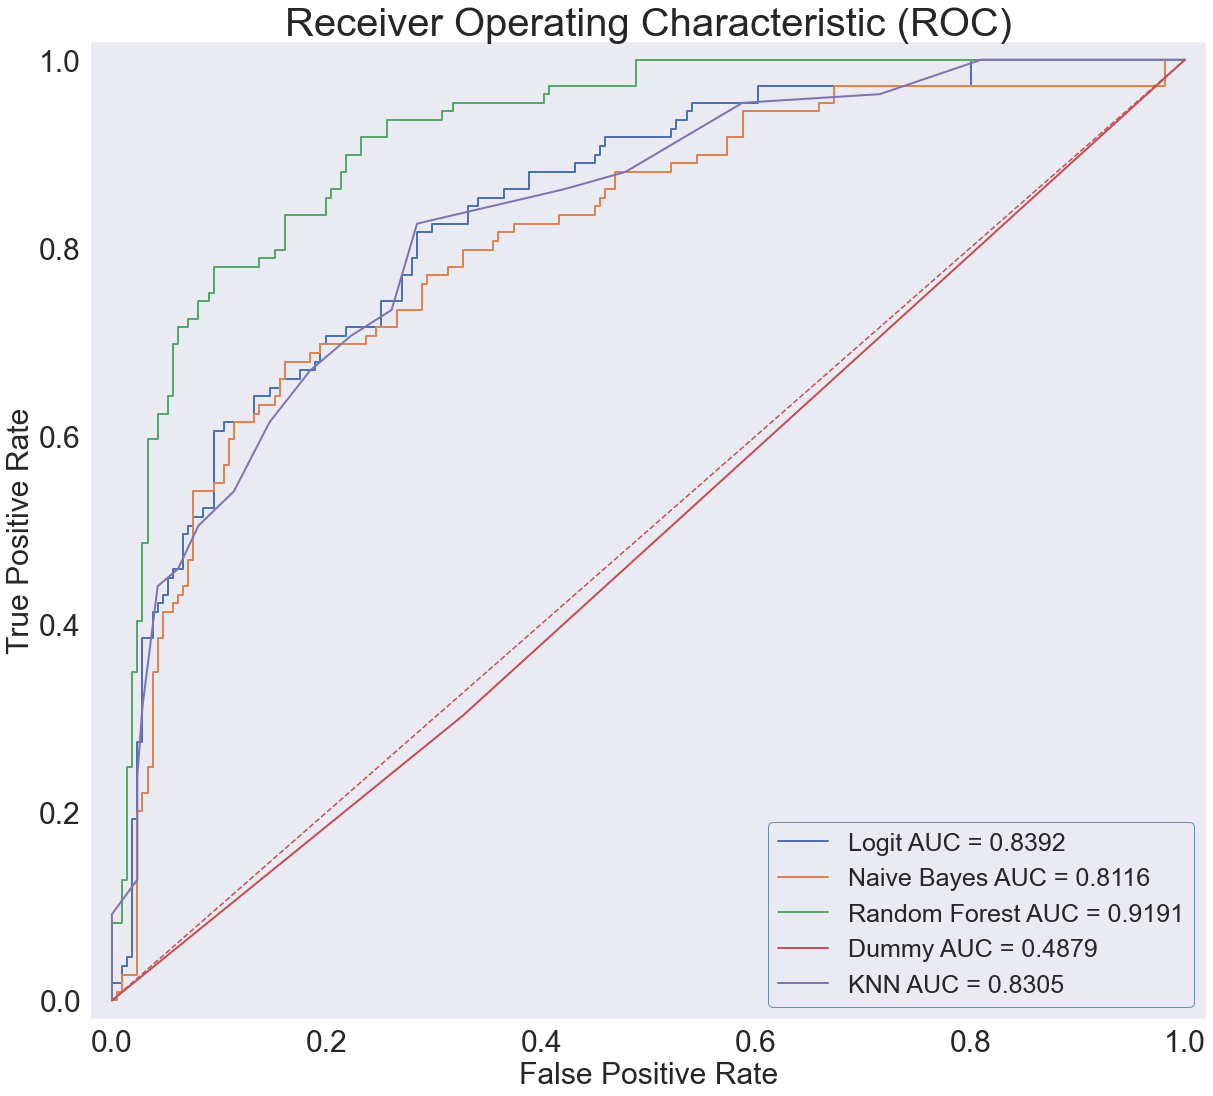

In [44]:
#in sample
roc_scores(X_val,y_val)

In [45]:
y_val.shape

(320,)

<ipython-input-42-2e96386c24cf>:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Receiver Operating Characteristic (ROC)', FontSize=40)
<ipython-input-42-2e96386c24cf>:33: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('True Positive Rate',FontSize=30)
<ipython-input-42-2e96386c24cf>:34: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('False Positive Rate',FontSize=30)


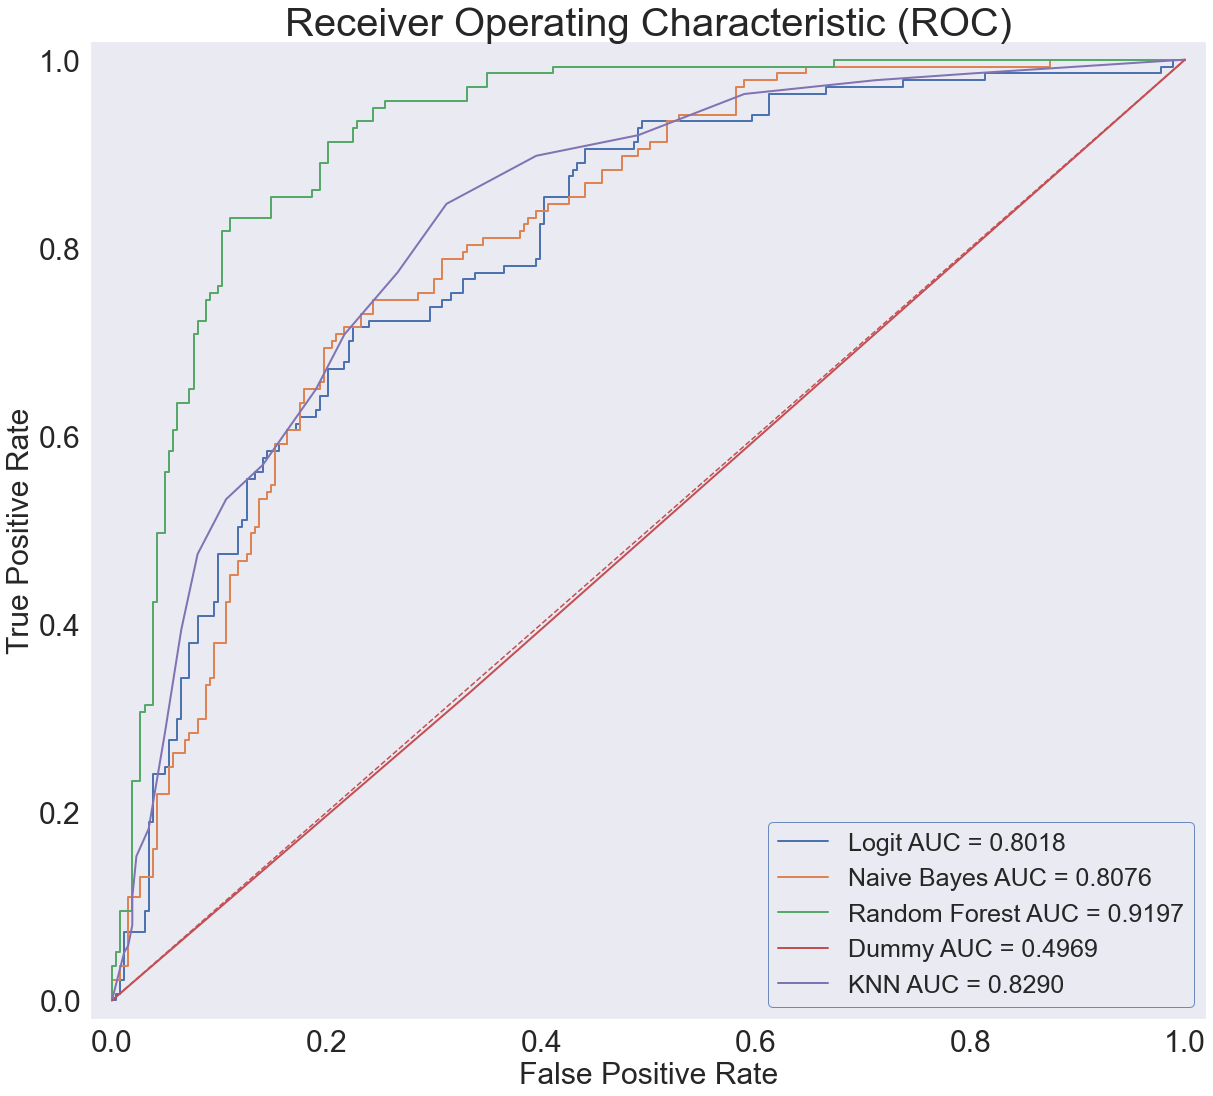

In [46]:
roc_scores(X_test,y_test)

### Recall (True Positive Rate) =  True positive rate diabetes/(True positive rate +false negative rate)
### Precision = True positive rate diabetes/ (True postive rate+ false positive rate)

### Accuracy: How correct the model is (True positive rate + True negative rate)/Total data)

### F1 score: combination of recall and precision into one metric. F1 score is the weighted average of precision and recall, taking BOTH false positives and false negatives into account. Usually much more useful than accuracy, especially with uneven classes.

### Find the best threshold for each model

In [47]:
def find_best_threshold(model, int_num_steps):
    highest_f1 = 0
    best_threshold = 0
    for threshold in np.linspace (0, 1, int_num_steps):
        y_predict = (model.predict_proba(X_test)[:, 1] >= threshold) 
        f1 = f1_score(y_test,y_predict)
        acc = accuracy_score(y_test,y_predict)
        rec = recall_score(y_test,y_predict)
        pre = precision_score(y_test,y_predict)
        if f1 > highest_f1:
            best_threshold, highest_f1, best_acc, best_rec, best_pre  = \
                threshold, f1, acc, rec, pre
    return best_threshold, highest_f1, best_acc, best_rec, best_pre

In [48]:
models = [logistic_grid, gnb_best, rf_grid,knn_best]
model_names = ["Logistic Regression", "Naive-Bayes", "Random Forest", "KNN"]
chart = list()
for item,name in zip(models,model_names):
    best_thresh, high_f1, high_acc, high_rec, high_pre = find_best_threshold(item,25)
#     print(f'Results for {name}:')
#     print('Best Threshold: ', best_thresh)
#     print('Highest_f1: ', high_f1)
    chart.append([name, best_thresh, high_f1, high_acc, high_rec, high_pre])

C:\Users\igung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\igung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\igung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\igung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision 

In [49]:
chart = pd.DataFrame(chart, columns=['Model', 'Best Threshold','F1 Score','Accuracy','Recall','Precision'])

In [50]:
chart

,Model,Best Threshold,F1 Score,Accuracy,Recall,Precision
0,Logistic Regression,0.208333,0.650538,0.6750,0.883212,0.514894
1,Naive-Bayes,0.333333,0.671280,0.7625,0.708029,0.638158
2,Random Forest,0.416667,0.805755,0.8650,0.817518,0.794326
3,KNN,0.291667,0.692537,0.7425,0.846715,0.585859


### Random Forest Final Prediction

In [51]:
# Random Forest
# using the default threshold of 0.5, which is what vanilla predict does
y_predict = rf_grid.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.8220,   Recall: 0.7080


In [52]:
# using the new threshold of 0.416
y_predict = (rf_grid.predict_proba(X_test)[:,1] > 0.416)
print("Threshold of 0.416:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
# What about the threshold of 0.06?
y_predict = (rf_grid.predict_proba(X_test)[:, 1] > 0.416)
f1_score(y_test, y_predict)

Threshold of 0.416:
Precision: 0.7943,   Recall: 0.8175


0.8057553956834532

### Logistic Regression Final prediction

In [53]:
# using the default threshold of 0.5, which is what vanilla predict does
y_predict = logistic_grid.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.6796,   Recall: 0.5109


In [54]:
# using the default threshold of 0.5, which is what vanilla predict does
y_predict = (logistic_grid.predict_proba(X_test)[:,1] > 0.999987)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

Default threshold:
Precision: 0.0000,   Recall: 0.0000


C:\Users\igung\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


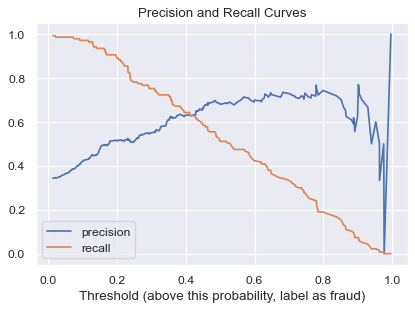

In [55]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, logistic_grid.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

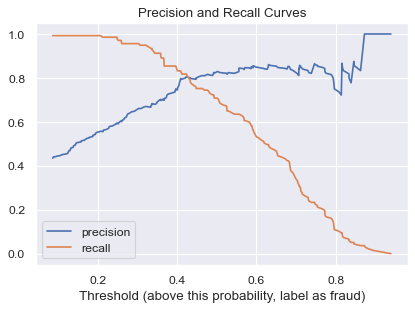

In [56]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rf_grid.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

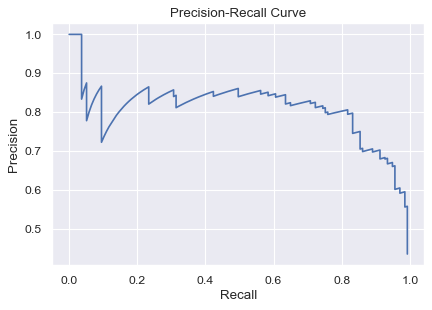

In [57]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [58]:
# Or we can just ask sklearn
y_predict = logistic_grid.predict(X_test)
f1_score(y_test, y_predict)

0.5833333333333334

In [59]:
# What about the threshold of 0.06?
y_predict = (logistic_grid.predict_proba(X_test)[:, 1] > 0.316)
f1_score(y_test, y_predict)

0.639240506329114

In [60]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logistic_grid.predict_proba(X_test)[:,1])

ROC AUC score =  0.8017540451278066


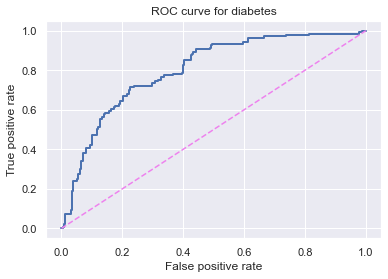

In [61]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for diabetes');
print("ROC AUC score = ", roc_auc_score(y_test,logistic_grid.predict_proba(X_test)[:,1]))

In [62]:
from sklearn.metrics import log_loss

print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, logistic_grid.predict_proba(X_test))))

Log-loss on logit: 0.5338


In [63]:
from sklearn.metrics import log_loss

print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, logistic_grid.predict_proba(X_test)[:,1] > 0.999987)))

Log-loss on logit: 11.8295


In [64]:
from sklearn.metrics import log_loss

print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, rf_grid.predict_proba(X_test)[:,1] > 0.895)))

Log-loss on logit: 11.6568


In [65]:
from sklearn.metrics import log_loss

print("Log-loss on logit: {:6.4f}".format(log_loss(y_test, rf_grid.predict_proba(X_test))))

Log-loss on logit: 0.3776


In [66]:
from sklearn.dummy import DummyClassifier

print("Log-loss on dummy classifier: {:6.4f}".format(log_loss(y_test, dummy.predict_proba(X_test))))

Log-loss on dummy classifier: 15.8015


In [67]:
print("Logistic accuracy: {:6.4f}".format(logistic_grid.score(X_test, y_test)))
print("Random Forest accuracy: {:6.4f}".format(rf_grid.score(X_test, y_test)))
print("Dummy accuracy: {:6.4f}".format(dummy.score(X_test, y_test)))

Logistic accuracy: 0.8018
Random Forest accuracy: 0.9197
Dummy accuracy: 0.5250


## RF plot

In [68]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, rf_grid.predict_proba(X_test)[:,1])

ROC AUC score =  0.9197080291970803


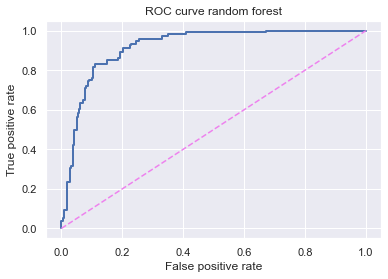

In [69]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve random forest');
print("ROC AUC score = ", roc_auc_score(y_test,rf_grid.predict_proba(X_test)[:,1]))

## KNN

In [70]:
#data = df.drop(columns=['Outcome'])
#answer = df['Outcome']


X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)


print(metrics.accuracy_score(y, y_pred))

0.9235


In [72]:
print(X.shape)
print(y.shape)

(2000, 8)
(2000,)


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
print(X_train.shape)
print(X_test.shape)

(1600, 8)
(400, 8)


In [75]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7825


In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.8   0.855 0.785 0.76  0.82  0.8   0.845 0.785 0.815 0.78 ]


In [78]:
print(scores.mean())

0.8045


In [79]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.9955, 0.9525, 0.9099999999999999, 0.8225, 0.8045, 0.821, 0.8314999999999999, 0.813, 0.7965, 0.7895000000000001, 0.782, 0.7805, 0.7775, 0.773, 0.7745, 0.7765, 0.7769999999999999, 0.7795, 0.7809999999999999, 0.7785, 0.7735000000000001, 0.7745, 0.7710000000000001, 0.772, 0.7665, 0.772, 0.7735, 0.7740000000000001, 0.776, 0.776]


Text(0, 0.5, 'Cross-Validated Accuracy')

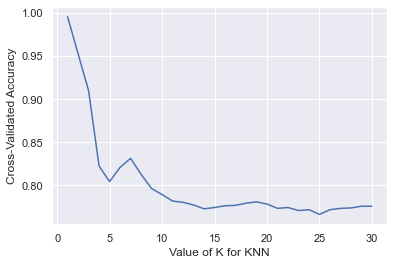

In [80]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

Text(0, 0.5, 'Cross-Validated Accuracy')

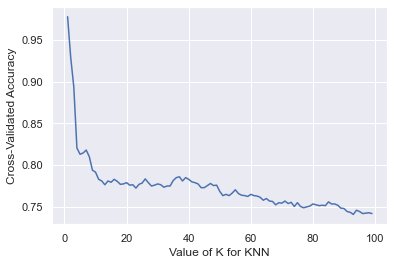

In [81]:
# Another cool viz 
k_range = list(range(1, 100))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, scoring='accuracy')
    k_scores.append(scores.mean())
#print(k_scores)

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [82]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.7785


## Appendix.

## Simple validation and test scores

In [83]:
data = df.drop(columns=['Outcome'])
answer = df['Outcome']

In [84]:
from sklearn.preprocessing import StandardScaler

X_break, X_test, y_break, y_test = train_test_split(data, answer, \
                                                    test_size=0.2, stratify=df['Outcome'],
                                                    random_state=42)

#random_state generates a set kind of deck for each random state. 42 will always be the same kind of split
X_train, X_val, y_train, y_val = train_test_split(X_break, y_break, \
                                                    test_size=0.2, stratify=y_break,
                                                    random_state=42)
# Initialize fit StandardScaler
#std_scale = StandardScaler().fit(X_train)

# Scale data
#X_train_std = std_scale.transform(X_train)
#X_val_std = std_scale.transform(X_val)
#X_test_std = std_scale.transform(X_test)

## KNN

In [85]:
knn = KNeighborsClassifier(n_neighbors=20)
knn_best = knn.fit(X_train, y_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_val, y_val)))

The score for kNN is
Training:  80.23%
Validation set:  80.00%


In [86]:
y_predict = knn.predict(X_test)
f1_score(y_test, y_predict)

0.6141078838174274

## SVM

In [87]:
from sklearn import svm
support_vector = svm.LinearSVC(dual=False)
svm_best = support_vector.fit(X_train, y_train)
print("The score for Support Vector is")
print("Training: {:6.2f}%".format(100*support_vector.score(X_train, y_train)))
print("Validation set: {:6.2f}%".format(100*support_vector.score(X_val, y_val)))

The score for Support Vector is
Training:  78.12%
Validation set:  80.00%


In [88]:
y_predict = support_vector.predict(X_test)
f1_score(y_test, y_predict)

0.6337448559670781

### Naive Bayes

In [89]:
# Fit a Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb_best = gnb.fit(X_train, y_train)

In [90]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_train, y_train)

0.76640625

In [91]:
nb.score(X_val, y_val)

0.76875

## Log regression

In [92]:
std_scale = StandardScaler()

#X_train = train_df[['elevation', 'price_per_sqft']]
#X_train_scaled = std_scale.fit_transform(X_train)

lm3 = LogisticRegression(solver='liblinear', C=1000)
lm3.fit(X_train, y_train)

LogisticRegression(C=1000, solver='liblinear')

In [93]:

y_predict = lm3.predict(X_train)  # This is a hard classifier
lm3.score(X_train, y_train)

0.77890625

In [94]:
lm3.score(X_val, y_val)

0.803125

In [95]:
y_predict = lm3.predict(X_test)
f1_score(y_test, y_predict)

0.6311475409836066

## Random Forest

In [96]:
randomforest = RandomForestClassifier(n_estimators=10)
rf =randomforest
rf.fit( X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [97]:
rf.score(X_train, y_train)

0.99765625

In [98]:
rf.score(X_val, y_val)

0.959375

In [99]:
y_predict = rf.predict(X_test)
f1_score(y_test, y_predict)

0.9097472924187726

In [100]:
df.groupby(['Outcome','Age']).sum()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
Outcome Age                                                                
0       21           169    16651          10155           2925    11873   
        22           231    16292           9966           3214    10825   
        23           132     9170           5314           1994    10809   
        24           205    11321           6519           2710     9235   
        25           164     9220           5588           1826     6331   
        26           128     7475           4434           1489     5762   
        27           138     6609           4489           1013     4018   
        28           246     8089           5059           1867     5087   
        29            90     4445           2899            688     1381   
        30           142     4505           2758            764     3427   
        31           119     2858           1419            345     3151   
        32            58     1585           1144            315      519   
        33            86     2101           1320            460      827   
        34           138     3025           1936            466     3323   
        35            71     1172            934            280      602   
        36            64     1728           1236            253      361   
        37           174     4287           2245            490     1809   
        38           105     1523           1334            374      340   
        39           197     3194           2018            879     2346   
        40            90     2410           1316            340     1140   
        41           158     2304           1477            519      837   
        42           170     2796           2146            680     1683   
        43            28      486            322            135      704   
        44            24      738            324              0        0   
        45           130     2490           1560            380      615   
        46            73     1247           1098            285      567   
        47            40      490            474             69      147   
        48            92     1148            844            222      330   
        49            42      873            468            186      828   
        50            23      968            562            164      584   
        51            54      778            552             52      270   
        52            26      212            140              0        0   
        53             6      315            225              0        0   
        54            34      704            436              0        0   
        55            45     1138            622             64      380   
        56            30      282            216             54        0   
        57            34      513            364              0        0   
        58            67     1694            962            160     1325   
        59             0      411            252             81        0   
        60            20      487            280             69      326   
        61            14      284            120             66      380   
        62            27      647            318             34        0   
        63            63     1457            856            267      540   
        64            24      360            234              0        0   
        65            30     1072            658            111        0   
        66            42     1058            546              0        0   
        67            40     1084            520              0        0   
        68            24      273            246              0        0   
        69            30      804            486              0        0   
        72             6      357              0              0        0   
        81            27      402            222             

In [101]:
df[df.Outcome==1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.0
mean,4.732456,141.568713,71.166667,22.633041,98.897661,35.320468,0.540681,36.956140,1.0
std,3.746358,32.027938,21.056467,17.612258,130.963804,7.162826,0.363689,10.924115,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.000000,120.000000,66.000000,0.000000,0.000000,30.900000,0.261000,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.300000,0.434000,36.000000,1.0
75%,7.000000,167.000000,82.000000,36.000000,167.000000,38.700000,0.727000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,600.000000,67.100000,2.420000,70.000000,1.0


In [102]:
df[df.Outcome==0].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.0
mean,3.168693,110.586626,68.094985,20.052432,70.563830,30.567477,0.434676,31.081307,0.0
std,2.913526,26.495327,18.060800,15.192338,98.018597,8.160265,0.294268,11.721103,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.000000,62.000000,0.000000,0.000000,25.600000,0.234750,23.000000,0.0
50%,2.000000,107.000000,70.000000,22.000000,44.000000,30.100000,0.342000,26.000000,0.0
75%,5.000000,126.000000,78.000000,31.000000,106.000000,35.400000,0.571000,36.250000,0.0
max,13.000000,197.000000,122.000000,110.000000,744.000000,80.600000,2.329000,81.000000,0.0


In [103]:
dfplot= df.groupby('Outcome')['Age'].value_counts()

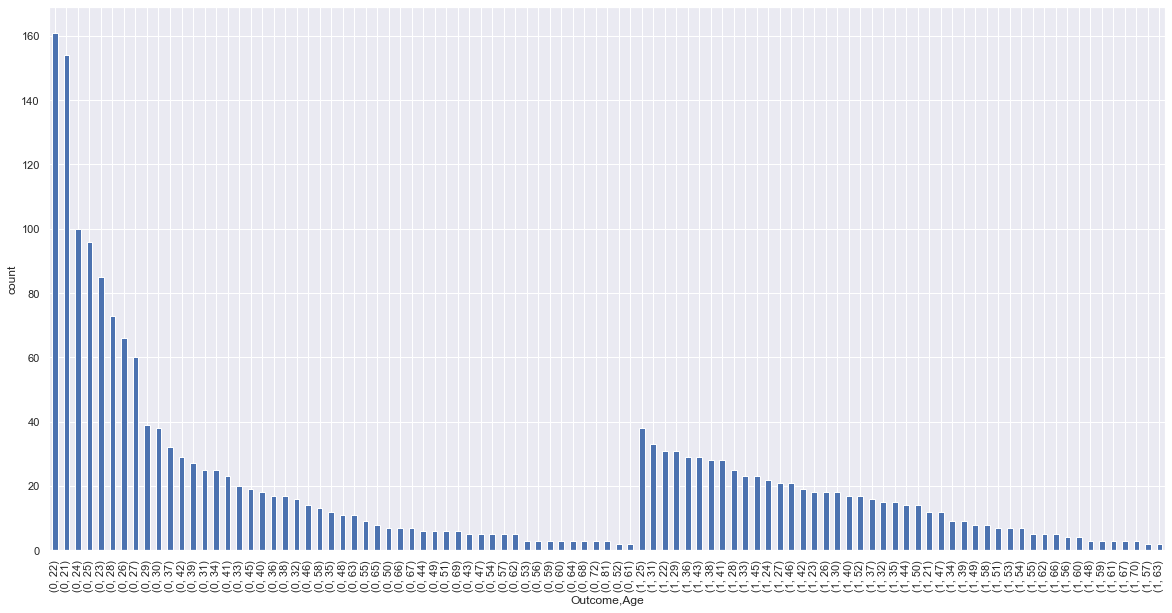

In [104]:
dfplot.plot(kind='bar', figsize=(20, 10))
plt.ylabel('count')
plt.show()

In [105]:
dfplot1= df.groupby('Outcome')['Glucose'].value_counts()

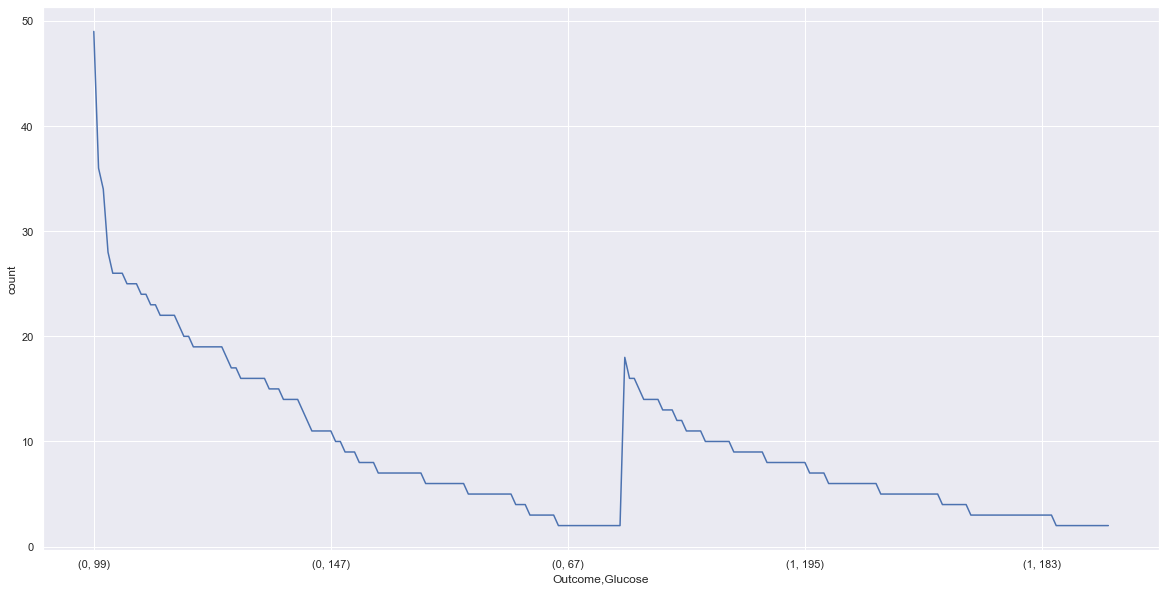

In [106]:
dfplot1.plot(kind='line', figsize=(20, 10))
plt.ylabel('count')
plt.show()

In [107]:
dfage = df[['Outcome','Age']]

In [108]:
df[df['Age'].between(10, 30)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,84,82,31,125,38.2,0.233,23,0
2,1,139,62,41,480,40.7,0.536,21,0
4,2,84,50,23,76,30.4,0.968,21,0
6,2,91,62,0,0,27.3,0.525,22,0
8,2,71,70,27,0,28.0,0.586,22,0
10,7,105,0,0,0,0.0,0.305,24,0
11,1,103,80,11,82,19.4,0.491,22,0
12,5,88,66,21,23,24.4,0.342,30,0
16,2,141,58,34,128,25.4,0.699,24,0
18,2,100,66,20,90,32.9,0.867,28,1


### Calculate condtions based from Age to see risk associated with other features

In [109]:
dftop=df[['Glucose','BMI','Age','DiabetesPedigreeFunction','BloodPressure','Outcome']]

In [110]:
condition1 = dftop['Glucose']>140 
condition2 = dftop['Age']>40
condition3 = dftop['BMI']>30
condition4 =dftop['Outcome']==1
condition5=dftop['Outcome']==0

In [111]:
dfcondition=dftop[condition1&condition2&condition3]

In [112]:
dfcondition

,Glucose,BMI,Age,DiabetesPedigreeFunction,BloodPressure,Outcome
7,171,45.4,54,0.721,110,1
13,150,34.7,42,0.718,66,0
14,187,37.7,41,0.254,68,1
48,188,47.9,43,0.137,78,1
64,179,34.2,60,0.164,95,0
79,155,33.3,51,1.353,76,1
97,180,43.3,41,0.282,0,1
100,178,39.9,41,0.331,84,1
176,150,35.2,54,0.692,78,1
192,167,37.6,43,0.165,106,1


In [113]:
dfhave = dftop[(condition1&condition2&condition3&condition4)]

In [114]:
dfhave.shape

(108, 6)

In [115]:
dfhavenot = dftop[(condition1&condition2&condition3&condition5)]

In [116]:
dfhavenot.shape

(29, 6)

In [117]:
dfconditionglucoseyes=dftop[condition1&condition4]

In [118]:
dfconditionglucoseyes.shape

(341, 6)

In [119]:
dfconditionglucoseno=dftop[condition1&condition5]

In [120]:
dfconditionglucoseno.shape

(167, 6)

### Using condition to get data by columns

In [121]:
cats = ['10-30', '31-50', '51-70', '71-100'] #specify age range.
bins = [0,30, 50, 70, 100] # allocate by bins to get age range. Must have 5 items vs 4 in cats

### Based on age. Calculate the risk.

In [122]:
# shows total by age group(10-30,31-50,51-70,71 onwards)
# shows have diabetes by group age and other features.
dftop[(condition5)].join(pd.get_dummies(pd.cut(dftop[(condition5)].Age, bins, labels=cats))).sum()


Glucose                     145532.000
BMI                          40226.800
Age                          40903.000
DiabetesPedigreeFunction       572.034
BloodPressure                89613.000
Outcome                          0.000
10-30                          872.000
31-50                          334.000
51-70                          104.000
71-100                           6.000
dtype: float64

In [123]:
# shows total by age group(10-30,31-50,51-70,71 onwards)
# shows no diabetes by group age and other features.

dftop[(condition4)].join(pd.get_dummies(pd.cut(dftop[(condition4)].Age, bins, labels=cats))).sum()

Glucose                     96833.000
BMI                         24159.200
Age                         25278.000
DiabetesPedigreeFunction      369.826
BloodPressure               48678.000
Outcome                       684.000
10-30                         234.000
31-50                         365.000
51-70                          85.000
71-100                          0.000
dtype: float64

### Based on Age and BMI > 30

In [124]:
dftop[(condition3&condition5)].join(pd.get_dummies(pd.cut(dftop[(condition3&condition5)].Age, bins, labels=cats))).sum()

Glucose                     74692.000
BMI                         24348.700
Age                         20750.000
DiabetesPedigreeFunction      297.816
BloodPressure               48212.000
Outcome                         0.000
10-30                         433.000
31-50                         201.000
51-70                          34.000
71-100                          0.000
dtype: float64

In [125]:
dftop[(condition3&condition4)].join(pd.get_dummies(pd.cut(dftop[(condition3&condition4)].Age, bins, labels=cats))).sum()

Glucose                     78188.000
BMI                         20515.200
Age                         19886.000
DiabetesPedigreeFunction      302.535
BloodPressure               39738.000
Outcome                       548.000
10-30                         200.000
31-50                         283.000
51-70                          65.000
71-100                          0.000
dtype: float64

### Based on Age and BMI > 30 and Glucose > 140

In [126]:
dftop[(condition1&condition3&condition5)].join(pd.get_dummies(pd.cut(dftop[(condition1&condition3&condition5)].Age, bins, labels=cats))).sum()

Glucose                     15978.000
BMI                          3953.500
Age                          3558.000
DiabetesPedigreeFunction       58.122
BloodPressure                7474.000
Outcome                         0.000
10-30                          52.000
31-50                          37.000
51-70                          12.000
71-100                          0.000
dtype: float64

In [127]:
dftop[(condition1&condition3&condition4)].join(pd.get_dummies(pd.cut(dftop[(condition1&condition3&condition4)].Age, bins, labels=cats))).sum()

Glucose                     48205.000
BMI                         10832.100
Age                         10813.000
DiabetesPedigreeFunction      162.614
BloodPressure               21331.000
Outcome                       288.000
10-30                          99.000
31-50                         139.000
51-70                          50.000
71-100                          0.000
dtype: float64

### Use random forest data to check on conditions

In [128]:
rfmodel = X_val #using model to check against conditions
rfmodel

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1503,3,128,78,0,0,21.1,0.268,55
827,6,105,70,32,68,30.8,0.122,37
866,1,125,70,24,110,24.3,0.221,25
395,17,163,72,41,114,40.9,0.817,47
1072,3,123,100,35,240,57.3,0.880,22
73,9,164,84,21,0,30.8,0.831,32
1207,5,136,84,41,88,35.0,0.286,35
1189,3,81,86,16,66,27.5,0.306,22
148,7,94,64,25,79,33.3,0.738,41
270,1,95,82,25,180,35.0,0.233,43


In [129]:
rfmodel.shape

(320, 8)

In [130]:
cats = ['10-30', '31-50', '51-70', '71-100']
bins = [0,30, 50, 70, 100]

In [131]:
rfmodel[(condition5)].join(pd.get_dummies(pd.cut(rfmodel[(condition5)].Age, bins, labels=cats))).sum()

<ipython-input-131-5f247397ab6a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rfmodel[(condition5)].join(pd.get_dummies(pd.cut(rfmodel[(condition5)].Age, bins, labels=cats))).sum()


Pregnancies                   635.000
Glucose                     23252.000
BloodPressure               14555.000
SkinThickness                4194.000
Insulin                     16682.000
BMI                          6396.800
DiabetesPedigreeFunction       94.779
Age                          6506.000
10-30                         145.000
31-50                          47.000
51-70                          18.000
71-100                          1.000
dtype: float64

In [132]:
rfmodel[(condition4)].join(pd.get_dummies(pd.cut(rfmodel[(condition4)].Age, bins, labels=cats))).sum()

<ipython-input-132-494ecf2b6452>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rfmodel[(condition4)].join(pd.get_dummies(pd.cut(rfmodel[(condition4)].Age, bins, labels=cats))).sum()


Pregnancies                   516.000
Glucose                     15744.000
BloodPressure                7897.000
SkinThickness                2275.000
Insulin                      9595.000
BMI                          3871.000
DiabetesPedigreeFunction       53.915
Age                          4128.000
10-30                          30.000
31-50                          63.000
51-70                          16.000
71-100                          0.000
dtype: float64

In [133]:
rfmodel[(condition3&condition5)].join(pd.get_dummies(pd.cut(rfmodel[(condition3&condition5)].Age, bins, labels=cats))).sum()

<ipython-input-133-14ce9fd2e4b7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rfmodel[(condition3&condition5)].join(pd.get_dummies(pd.cut(rfmodel[(condition3&condition5)].Age, bins, labels=cats))).sum()


Pregnancies                   313.00
Glucose                     11951.00
BloodPressure                7599.00
SkinThickness                2774.00
Insulin                     11821.00
BMI                          3907.80
DiabetesPedigreeFunction       46.34
Age                          3303.00
10-30                          70.00
31-50                          30.00
51-70                           6.00
71-100                          0.00
dtype: float64

In [134]:
rfmodel[(condition3&condition4)].join(pd.get_dummies(pd.cut(rfmodel[(condition3&condition4)].Age, bins, labels=cats))).sum()

<ipython-input-134-5b21f7368e77>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rfmodel[(condition3&condition4)].join(pd.get_dummies(pd.cut(rfmodel[(condition3&condition4)].Age, bins, labels=cats))).sum()


Pregnancies                   418.000
Glucose                     13147.000
BloodPressure                6661.000
SkinThickness                2040.000
Insulin                      8489.000
BMI                          3376.100
DiabetesPedigreeFunction       47.517
Age                          3361.000
10-30                          27.000
31-50                          52.000
51-70                          12.000
71-100                          0.000
dtype: float64

In [135]:
rfmodel[(condition1&condition3&condition5)].join(pd.get_dummies(pd.cut(rfmodel[(condition1&condition3&condition5)].Age, bins, labels=cats))).sum()

<ipython-input-135-fc92dfdf9e65>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rfmodel[(condition1&condition3&condition5)].join(pd.get_dummies(pd.cut(rfmodel[(condition1&condition3&condition5)].Age, bins, labels=cats))).sum()


Pregnancies                   48.000
Glucose                     2457.000
BloodPressure               1204.000
SkinThickness                434.000
Insulin                     3661.000
BMI                          615.000
DiabetesPedigreeFunction       9.853
Age                          525.000
10-30                         10.000
31-50                          5.000
51-70                          1.000
71-100                         0.000
dtype: float64

In [136]:
rfmodel[(condition1&condition3&condition4)].join(pd.get_dummies(pd.cut(rfmodel[(condition1&condition3&condition4)].Age, bins, labels=cats))).sum()

<ipython-input-136-7b7599e21cbd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rfmodel[(condition1&condition3&condition4)].join(pd.get_dummies(pd.cut(rfmodel[(condition1&condition3&condition4)].Age, bins, labels=cats))).sum()


Pregnancies                  230.000
Glucose                     7885.000
BloodPressure               3567.000
SkinThickness               1013.000
Insulin                     4884.000
BMI                         1737.300
DiabetesPedigreeFunction      24.564
Age                         1829.000
10-30                         10.000
31-50                         28.000
51-70                          9.000
71-100                         0.000
dtype: float64